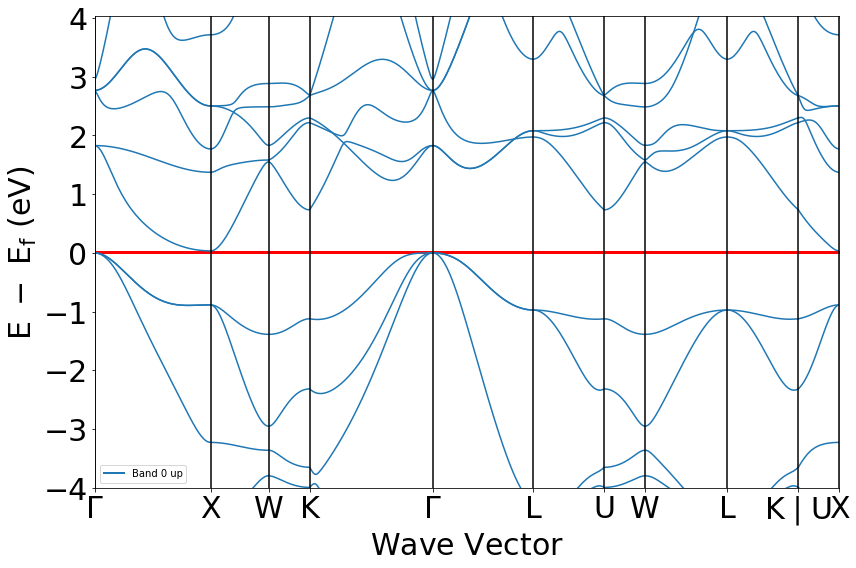

La structure de bande présente un gap énergétique de 0.0338 eV, celui-ci est indirect et à lieu en \Gamma-X.



In [117]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

API_KEY = "qSvDCgTjbfREtdXQwIBl"
material_id = "mp-11869"


def download_bands(material_id, API_KEY, verbose = False) :
    with MPRester(API_KEY) as m:
        bands = m.get_bandstructure_by_material_id(material_id)
    if verbose == True :
        BSPlotter(bands).get_plot()
        data = BSPlotter(bands).bs_plot_data()
        indices = data.get('ticks').get('distance')
        plt.fill_between(np.linspace(indices[0], indices[-1], 2), bands.get_band_gap()["energy"], color = "red")
        plt.show()
    return bands

def get_gap_info(bands, verbose = True):
    energy_gap = bands.get_band_gap()["energy"]
    direct = bands.get_band_gap()["direct"]
    trans = bands.get_band_gap()["transition"]
    if verbose :
        if direct :
            print(f"La structure de bande présente un gap énergétique de {energy_gap:.4f} eV, celui-ci est direct et à lieu en {trans}.\n")
        else :
            print(f"La structure de bande présente un gap énergétique de {energy_gap:.4f} eV, celui-ci est indirect et à lieu en {trans}.\n")
    return energy_gap, direct, trans


bands = download_bands(material_id, API_KEY, True)
energy_gap, direct, trans = get_gap_info(bands)

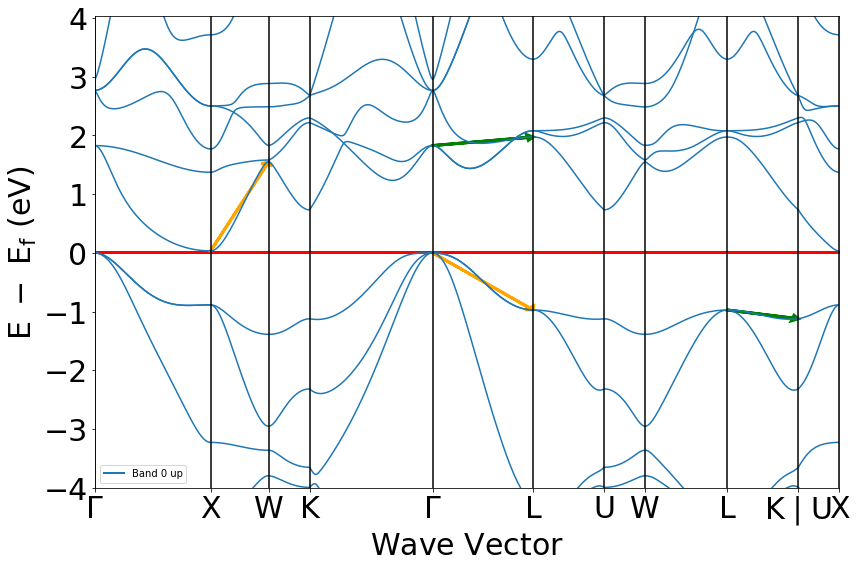

In [116]:
def plot_dispersion(bands):
    data = BSPlotter(bands).bs_plot_data()
    energies = data.get('energy').get('1')
    vbm_index = list(bands.get_vbm()['band_index'].values())[0][-1]
    cbm_index = list(bands.get_cbm()['band_index'].values())[0][0]
    indices = np.unique(np.array(data.get('ticks').get('distance')))
    step = indices[1:] - indices[:-1]
    valence_slope = np.empty(len(step))
    conduction_slope = np.empty(len(step))
    for i in range(len(step)):
        valence_slope[i] = (energies[i][vbm_index][-1] - energies[i][vbm_index][0])/step[i]
        conduction_slope[i] = (energies[i][cbm_index][-1] - energies[i][cbm_index][0])/step[i]
    valence_min_index = np.argmin(abs(valence_slope))
    valence_max_index = np.argmax(abs(valence_slope))
    conduction_min_index = np.argmin(abs(conduction_slope))
    conduction_max_index = np.argmax(abs(conduction_slope))
    plot = BSPlotter(bands).get_plot()
    plt.arrow(indices[valence_min_index], energies[valence_min_index][vbm_index][0], step[valence_min_index], energies[valence_min_index][vbm_index][-1]-energies[valence_min_index][vbm_index][0], head_width=0.10, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
    plt.arrow(indices[valence_max_index], energies[valence_max_index][vbm_index][0], step[valence_max_index], energies[valence_max_index][vbm_index][-1]-energies[valence_max_index][vbm_index][0], head_width=0.10, head_length=0.05, linewidth=3, color='orange', length_includes_head=True)
    plt.arrow(indices[conduction_min_index], energies[conduction_min_index][cbm_index][0], step[conduction_min_index], energies[conduction_min_index][cbm_index][-1]-energies[conduction_min_index][cbm_index][0], head_width=0.10, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
    plt.arrow(indices[conduction_max_index], energies[conduction_max_index][cbm_index][0], step[conduction_max_index], energies[conduction_max_index][cbm_index][-1]-energies[conduction_max_index][cbm_index][0], head_width=0.10, head_length=0.05, linewidth=3, color='orange', length_includes_head=True)
    plt.fill_between(np.linspace(indices[0], indices[-1], 2), bands.get_band_gap()["energy"], color = "red")
    plt.show()

plot_dispersion(bands)

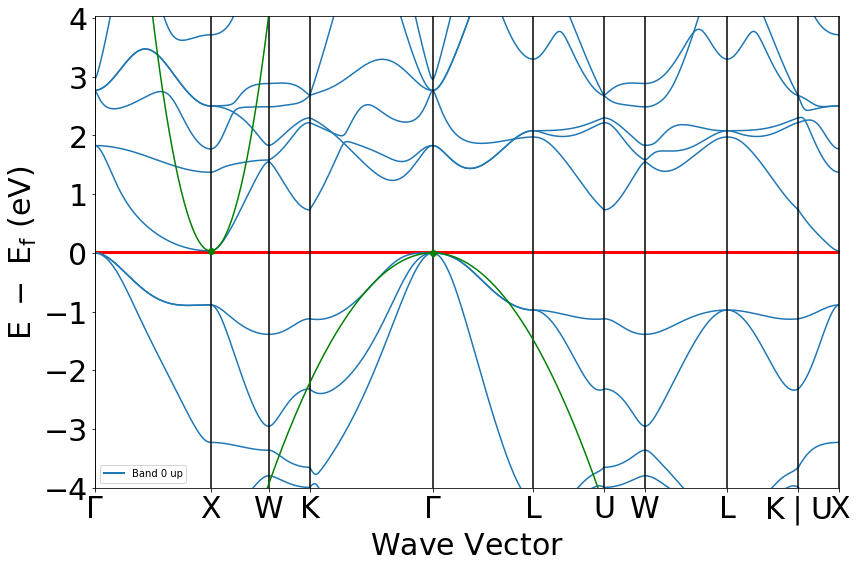

La masse effective au sommet de la bande de conduction est de -1.7155500859265274e-30 kg.
 Celle au bas de la bande de conduction est de 9.55798392568503e-33 kg.


In [126]:
def calculate_effective_mass(bands, verbose=True):
    data = BSPlotter(bands).bs_plot_data()
    energies = data.get('energy').get('1')
    vbm_index = list(bands.get_vbm()['band_index'].values())[0][-1]
    cbm_index = list(bands.get_cbm()['band_index'].values())[0][0]
    indices = data.get('distances')
    valence_dEdk = 2*energies[4][vbm_index][1]*(1.602176634e-39/((indices[4][1]-indices[4][0])**2))
    valence_eff_mass = (6.626e-34/(2*np.pi))**2/valence_dEdk
    conduction_dEdk = 2*energies[1][cbm_index][1]*(1.602176634e-39/((indices[1][1]-indices[1][0])**2))
    conduction_eff_mass = (6.626e-34/(2*np.pi))**2/conduction_dEdk
    if verbose :
        valence_X = [2*indices[4][0] - indices[4][1], indices[4][0], indices[4][1]]
        valence_Y = [energies[4][vbm_index][1], energies[4][vbm_index][0], energies[4][vbm_index][1]]
        conduction_X = [2*indices[1][0] - indices[1][1], indices[1][0], indices[1][1]]
        conduction_Y = [energies[1][cbm_index][1], energies[1][cbm_index][0], energies[1][cbm_index][1]]
        energy_gap = bands.get_band_gap()["energy"]
        x = np.linspace(indices[0][0], indices[-1][-1], 500)
        plot = BSPlotter(bands).get_plot()
        plt.plot([indices[4][0],indices[1][0]],[0,energy_gap], 'o', color='g')
        plt.plot(x, np.polyval(np.polyfit(valence_X, valence_Y, 2), x), 'g')
        plt.plot(x, np.polyval(np.polyfit(conduction_X, conduction_Y, 2), x), 'g')
        plt.fill_between(np.linspace(indices[0][0], indices[-1][-1], 2), bands.get_band_gap()["energy"], color = "red")
        plt.show()
        print(f"La masse effective au sommet de la bande de conduction est de {valence_eff_mass} kg.\n Celle au bas de la bande de conduction est de {conduction_eff_mass} kg.")
    return valence_eff_mass, conduction_eff_mass

valence_eff_mass, conduction_eff_mass = calculate_effective_mass(bands)